## 1. Configuração Inicial

In [1]:
import warnings
import json
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from openai import OpenAI
from tqdm import tqdm
import time

# Importando funções do módulo local
from embedding_utils import (
    get_embedding,
    cosine_similarity,
    buscar_wikipedia,
    dividir_em_chunks,
)

warnings.filterwarnings("ignore")

# Carrega variáveis do arquivo .env
load_dotenv()

# Cliente OpenAI
client = OpenAI()

print("✅ Bibliotecas importadas e cliente OpenAI configurado!")

✅ Bibliotecas importadas e cliente OpenAI configurado!


## 2. Lista de 30 Escritores Brasileiros de Renome

Selecionamos escritores importantes da literatura brasileira de diferentes períodos.

In [2]:
# Lista de 50 escritores brasileiros clássicos (formato Wikipedia)
escritores_brasileiros = [
    # Romantismo e Realismo
    "Machado_de_Assis",
    "José_de_Alencar",
    "Lima_Barreto_(escritor)",
    "Aluísio_Azevedo",
    "Joaquim_Manuel_de_Macedo",
    "Visconde_de_Taunay",
    "Raul_Pompeia",
    "Bernardo_Guimarães",
    # Modernismo - 1ª Geração
    "Mário_de_Andrade",
    "Oswald_de_Andrade",
    "Manuel_Bandeira",
    "Menotti_Del_Picchia",
    "Cassiano_Ricardo",
    # Modernismo - 2ª Geração (Prosa)
    "Graciliano_Ramos",
    "Jorge_Amado",
    "José_Lins_do_Rego",
    "Érico_Veríssimo",
    "Rachel_de_Queiroz",
    "Dyonelio_Machado",
    # Modernismo - 2ª Geração (Poesia)
    "Carlos_Drummond_de_Andrade",
    "Cecília_Meireles",
    "Vinícius_de_Moraes",
    "Murilo_Mendes",
    "Jorge_de_Lima",
    # Modernismo - 3ª Geração
    "Guimarães_Rosa",
    "Clarice_Lispector",
    "João_Cabral_de_Melo_Neto",
    "Ferreira_Gullar",
    # Parnasianismo e Simbolismo
    "Olavo_Bilac",
    "Raimundo_Correia",
    "Gregório_de_Matos",
    "Cruz_e_Sousa",
    "Alphonsus_de_Guimaraens",
    # Pré-Modernismo
    "Euclides_da_Cunha",
    "Monteiro_Lobato",
    "Augusto_dos_Anjos",
    "Coelho_Neto",
    "Graça_Aranha",
    # Poesia Romântica
    "Castro_Alves",
    "Gonçalves_Dias",
    "Álvares_de_Azevedo",
    "Casimiro_de_Abreu",
    "Fagundes_Varela",
    # Contemporâneos Clássicos
    "Rubem_Braga",
    "Rubem_Fonseca",
    "Lygia_Fagundes_Telles",
    "Hilda_Hilst",
    "Ariano_Suassuna",
    "Autran_Dourado",
]

print(
    f"📚 Lista de {len(escritores_brasileiros)} escritores brasileiros clássicos para análise:"
)
for i, escritor in enumerate(escritores_brasileiros, 1):
    print(f"   {i:2d}. {escritor.replace('_', ' ')}")

📚 Lista de 49 escritores brasileiros clássicos para análise:
    1. Machado de Assis
    2. José de Alencar
    3. Lima Barreto (escritor)
    4. Aluísio Azevedo
    5. Joaquim Manuel de Macedo
    6. Visconde de Taunay
    7. Raul Pompeia
    8. Bernardo Guimarães
    9. Mário de Andrade
   10. Oswald de Andrade
   11. Manuel Bandeira
   12. Menotti Del Picchia
   13. Cassiano Ricardo
   14. Graciliano Ramos
   15. Jorge Amado
   16. José Lins do Rego
   17. Érico Veríssimo
   18. Rachel de Queiroz
   19. Dyonelio Machado
   20. Carlos Drummond de Andrade
   21. Cecília Meireles
   22. Vinícius de Moraes
   23. Murilo Mendes
   24. Jorge de Lima
   25. Guimarães Rosa
   26. Clarice Lispector
   27. João Cabral de Melo Neto
   28. Ferreira Gullar
   29. Olavo Bilac
   30. Raimundo Correia
   31. Gregório de Matos
   32. Cruz e Sousa
   33. Alphonsus de Guimaraens
   34. Euclides da Cunha
   35. Monteiro Lobato
   36. Augusto dos Anjos
   37. Coelho Neto
   38. Graça Aranha
   39. Castr

## 3. Coleta de Dados da Wikipedia

In [3]:
# Buscando conteúdo da Wikipedia para cada escritor
conteudos_escritores = {}
erros = []

print("🔍 Buscando informações na Wikipedia...\n")

for escritor in tqdm(escritores_brasileiros, desc="Coletando dados"):
    try:
        dados = buscar_wikipedia(escritor)
        conteudos_escritores[escritor] = dados
        time.sleep(0.5)  # Delay para não sobrecarregar a Wikipedia
    except Exception as e:
        erros.append((escritor, str(e)))
        print(f"   ⚠️ Erro ao buscar {escritor}: {e}")

print(f"\n✅ {len(conteudos_escritores)} páginas carregadas com sucesso!")
if erros:
    print(f"⚠️ {len(erros)} erros encontrados")

🔍 Buscando informações na Wikipedia...



Coletando dados: 100%|██████████| 49/49 [01:18<00:00,  1.60s/it]


✅ 49 páginas carregadas com sucesso!


In [4]:
# Visualizando um exemplo
if conteudos_escritores:
    exemplo_escritor = list(conteudos_escritores.keys())[0]
    exemplo_dados = conteudos_escritores[exemplo_escritor]

    print(f"📖 Exemplo - {exemplo_dados['titulo']}")
    print(f"🔗 URL: {exemplo_dados['url']}")
    print(f"📝 Número de parágrafos: {len(exemplo_dados['conteudo'])}")
    print(f"\n📄 Primeiro parágrafo:")
    print(exemplo_dados["conteudo"][0][:500] + "...")

📖 Exemplo - Machado de Assis
🔗 URL: https://pt.wikipedia.org/wiki/Machado_de_Assis
📝 Número de parágrafos: 107

📄 Primeiro parágrafo:
Joaquim Maria Machado de Assis (Rio de Janeiro, 21 de junho de 1839 – Rio de Janeiro, 29 de setembro de 1908) foi um escritor brasileiro, amplamente reconhecido por críticos, estudiosos, escritores e leitores como o maior expoente da literatura brasileira. Sua produção literária abrangeu praticamente todos os gêneros, incluindo poesia, romance, crônica, dramaturgia, conto, folhetim, jornalismo e crítica literária. Machado de Assis testemunhou a Abolição da Escravatura e a transição política do B...


## 4. Criação de Chunks e Geração de Embeddings

In [5]:
# Criando chunks de todos os conteúdos
todos_chunks = []
metadados_escritores = []

print("📦 Criando chunks para cada escritor...\n")

for escritor, dados in conteudos_escritores.items():
    # Junta todos os parágrafos
    texto_completo = " ".join(dados["conteudo"])

    # Debug: verificar se o texto está vazio
    if len(texto_completo.strip()) < 100:
        print(
            f"   ⚠️ {dados['titulo']}: texto muito curto ({len(texto_completo)} chars)"
        )
        print(f"      Parágrafos retornados: {len(dados['conteudo'])}")
        if dados["conteudo"]:
            print(f"      Primeiro parágrafo: {dados['conteudo'][0][:100]}...")
        continue

    # Divide em chunks
    chunks = dividir_em_chunks(
        texto_completo, titulo_pagina="", tamanho_max=500, overlap=70
    )

    print(f"   📄 {dados['titulo']}: {len(chunks)} chunks")

    for chunk in chunks:
        todos_chunks.append(chunk)
        metadados_escritores.append(
            {
                "escritor": dados["titulo"],
                "escritor_wiki": escritor,
                "url": dados["url"],
            }
        )

print(f"\n✅ Total: {len(todos_chunks)} chunks criados!")

# Verificar escritores sem chunks
escritores_com_chunks = set([m["escritor"] for m in metadados_escritores])
escritores_buscados = set([d["titulo"] for d in conteudos_escritores.values()])
sem_chunks = escritores_buscados - escritores_com_chunks
if sem_chunks:
    print(f"\n⚠️ Escritores sem chunks: {sem_chunks}")

📦 Criando chunks para cada escritor...

   📄 Machado de Assis: 262 chunks
   📄 José de Alencar: 83 chunks
   📄 Lima Barreto (escritor): 36 chunks
   📄 Aluísio Azevedo: 8 chunks
   📄 Joaquim Manuel de Macedo: 8 chunks
   📄 Visconde de Taunay: 22 chunks
   📄 Raul Pompeia: 31 chunks
   📄 Bernardo Guimarães: 13 chunks
   📄 Mário de Andrade: 70 chunks
   📄 Oswald de Andrade: 62 chunks
   📄 Manuel Bandeira: 31 chunks
   📄 Menotti Del Picchia: 12 chunks
   📄 Cassiano Ricardo: 10 chunks
   📄 Graciliano Ramos: 17 chunks
   📄 Jorge Amado: 38 chunks
   📄 José Lins do Rego: 31 chunks
   📄 Érico Veríssimo: 63 chunks
   📄 Rachel de Queiroz: 69 chunks
   📄 Dyonelio Machado: 10 chunks
   📄 Carlos Drummond de Andrade: 12 chunks
   📄 Cecília Meireles: 32 chunks
   📄 Vinícius de Moraes: 70 chunks
   📄 Murilo Mendes: 62 chunks
   📄 Jorge de Lima: 27 chunks
   📄 Guimarães Rosa: 19 chunks
   📄 Clarice Lispector: 72 chunks
   📄 João Cabral de Melo Neto: 16 chunks
   📄 Ferreira Gullar: 25 chunks
   📄 Olavo Bi

In [6]:
# Gerando embeddings para todos os chunks
print("🧠 Gerando embeddings para todos os chunks...\n")
print("   ⏳ Isso pode levar alguns minutos...\n")

embeddings_escritores = []

for i, chunk in enumerate(tqdm(todos_chunks, desc="Gerando embeddings")):
    emb = get_embedding(client, chunk)
    embeddings_escritores.append(emb)

    # Pequena pausa para respeitar rate limits
    if (i + 1) % 50 == 0:
        time.sleep(1)

embeddings_escritores = np.array(embeddings_escritores)

print(f"\n✅ {len(embeddings_escritores)} embeddings gerados!")
print(f"📐 Dimensão dos embeddings: {embeddings_escritores.shape}")

🧠 Gerando embeddings para todos os chunks...

   ⏳ Isso pode levar alguns minutos...



Gerando embeddings: 100%|██████████| 1952/1952 [23:53<00:00,  1.36it/s]



✅ 1952 embeddings gerados!
📐 Dimensão dos embeddings: (1952, 3072)


In [7]:
# Salvando os dados para uso futuro
np.save("embeddings_escritores.npy", embeddings_escritores)

with open("metadados_escritores.json", "w", encoding="utf-8") as f:
    json.dump(metadados_escritores, f, ensure_ascii=False, indent=2)

with open("chunks_escritores.json", "w", encoding="utf-8") as f:
    json.dump(todos_chunks, f, ensure_ascii=False, indent=2)

print("💾 Dados salvos:")
print("   - embeddings_escritores.npy")
print("   - metadados_escritores.json")
print("   - chunks_escritores.json")

💾 Dados salvos:
   - embeddings_escritores.npy
   - metadados_escritores.json
   - chunks_escritores.json


In [8]:
# leitura dos dados salvos (exemplo)
embeddings_escritores = np.load("embeddings_escritores.npy")
with open("metadados_escritores.json", "r", encoding="utf-8") as f:
    metadados_escritores = json.load(f)
with open("chunks_escritores.json", "r", encoding="utf-8") as f:
    todos_chunks = json.load(f)

## 5. Busca Semântica: Chunks Relacionados à Morte de Cada Escritor

In [9]:
def buscar_chunks_relevantes(query: str, escritor_filtro: str, top_k: int = 3) -> list:
    """
    Busca os chunks mais relevantes para uma query, filtrando por escritor.

    Args:
        query: A consulta de busca
        escritor_filtro: Nome do escritor para filtrar (formato título, não wiki)
        top_k: Número de chunks a retornar

    Returns:
        Lista de dicionários com chunk, similaridade e metadados
    """
    # Gera embedding da query
    emb_query = get_embedding(client, query)

    # Filtra chunks do escritor específico e calcula similaridade
    resultados = []
    for i, (chunk, meta) in enumerate(zip(todos_chunks, metadados_escritores)):
        if meta["escritor"] == escritor_filtro:
            sim = cosine_similarity(emb_query, embeddings_escritores[i])
            resultados.append(
                {
                    "chunk": chunk,
                    "similaridade": sim,
                    "escritor": meta["escritor"],
                    "url": meta["url"],
                }
            )

    # Ordena por similaridade
    resultados.sort(key=lambda x: x["similaridade"], reverse=True)

    return resultados[:top_k]


print("✅ Função de busca semântica definida!")

✅ Função de busca semântica definida!


In [30]:
# Para cada escritor, buscar chunks relacionados à morte
TOP_K = 4  # Número de chunks por escritor

print("🔍 Buscando chunks relacionados à morte de cada escritor...\n")

chunks_morte_por_escritor = {}

# Query otimizada para encontrar informações sobre causa da morte
# Inclui termos sobre: morte, causas, doenças, circunstâncias
query_morte = """faleceu morreu morte óbito causa falecimento doença acidente assassinato últimos dias final de vida"""


escritores_unicos = list(set([m["escritor"] for m in metadados_escritores]))

for escritor in tqdm(escritores_unicos, desc="Buscando chunks"):
    query_morte_escritor = f"{escritor} {query_morte}"
    chunks_relevantes = buscar_chunks_relevantes(
        query=query_morte_escritor, escritor_filtro=escritor, top_k=TOP_K
    )
    chunks_morte_por_escritor[escritor] = chunks_relevantes

print(
    f"\n✅ Chunks de morte encontrados para {len(chunks_morte_por_escritor)} escritores!"
)

🔍 Buscando chunks relacionados à morte de cada escritor...



Buscando chunks: 100%|██████████| 49/49 [00:30<00:00,  1.62it/s]


✅ Chunks de morte encontrados para 49 escritores!


In [48]:
# Visualizando um exemplo
exemplo = list(chunks_morte_por_escritor.items())[1]
print(f"📖 Exemplo: {exemplo[0]}")
print(f"{'─' * 70}")
for i, chunk_info in enumerate(exemplo[1], 1):
    print(f"\n🔹 Chunk {i} (similaridade: {chunk_info['similaridade']:.4f}):")
    print(f"   {chunk_info['chunk']}...")

📖 Exemplo: Cruz e Sousa
──────────────────────────────────────────────────────────────────────

🔹 Chunk 1 (similaridade: 0.6655):
   Os poetas frequentemente trocavam cartas apesar de a distância os ter separado. Morreu em 19 de março de 1898 em Minas Gerais, na localidade de Curral Novo, então pertencente ao município de Barbacena. Em 1948, a localidade se emancipou e passou a se chamar Antônio Carlos. Cruz e Sousa estava em Curral Novo pois fora transportado às pressas vencido pela tuberculose. Teve o seu corpo transportado para o Rio de Janeiro em um vagão destinado ao transporte de cavalos....

🔹 Chunk 2 (similaridade: 0.5877):
   João da Cruz e Sousa (Nossa Senhora do Desterro, 24 de novembro de 1861 — Curral Novo, 19 de março de 1898) foi um poeta brasileiro, reconhecido como o primeiro e o principal expoente do simbolismo no Brasil. Filho de escravos alforriados, teve a vida marcada pela negritude e pela causa abolicionista, pelo que recebeu as alcunhas de Dante Negro, Cisne Neg

## 6. Definição das Classes de Causa de Morte

In [33]:
# Classes pré-definidas para classificação
CLASSES_CAUSA_MORTE = [
    "problema_cardiaco",  # Infarto, insuficiência cardíaca, etc.
    "cancer",  # Qualquer tipo de câncer
    "acidente",  # Acidentes de trânsito, quedas, etc.
    "assassinato",  # Morte violenta intencional
    "doenca_respiratoria",  # Pneumonia, tuberculose, etc.
    "avc",  # Acidente vascular cerebral
    "diabetes",  # Complicações de diabetes
    "suicidio",  # Suicídio
    "doenca_neurologica",  # Alzheimer, Parkinson, etc.
    "complicacoes_cirurgicas",  # Morte durante ou após cirurgias
    "infeccao",  # Sepse, infecções graves
    "idade_avancada",  # Morte natural por idade
    "outra_doenca",  # Outras doenças não especificadas
    "desconhecida",  # Informação não disponível
]

CLASSES_DESCRICAO = """
Classes disponíveis para classificação:
- problema_cardiaco: Infarto, insuficiência cardíaca, arritmia, etc.
- cancer: Qualquer tipo de câncer, tumor ou neoplasia
- acidente: Acidentes de trânsito, quedas, afogamento, etc.
- assassinato: Morte violenta intencional, homicídio, tiro, facada
- doenca_respiratoria: Pneumonia, tuberculose, enfisema, etc.
- avc: Acidente vascular cerebral (derrame)
- diabetes: Complicações de diabetes
- suicidio: Suicídio confirmado
- doenca_neurologica: Alzheimer, Parkinson, ELA, etc.
- complicacoes_cirurgicas: Morte durante ou após procedimentos cirúrgicos
- infeccao: Sepse, infecções graves
- idade_avancada: Morte natural por senilidade
- outra_doenca: Outras doenças não listadas acima
- desconhecida: Quando a informação não está disponível no contexto
"""

print("📋 Classes de causa de morte definidas:")
for classe in CLASSES_CAUSA_MORTE:
    print(f"   • {classe}")

📋 Classes de causa de morte definidas:
   • problema_cardiaco
   • cancer
   • acidente
   • assassinato
   • doenca_respiratoria
   • avc
   • diabetes
   • suicidio
   • doenca_neurologica
   • complicacoes_cirurgicas
   • infeccao
   • idade_avancada
   • outra_doenca
   • desconhecida


## 7. Prompts para Classificação

### 7.1 Prompt Básico
Um prompt simples e direto, sem técnicas avançadas de engenharia de prompts.

### 7.2 Prompt com Engenharia de Prompts
Utiliza diversas técnicas:
- **Chain-of-Thought (CoT)**: Solicita raciocínio passo a passo
- **Few-shot examples**: Fornece exemplos de classificação
- **Role prompting**: Define um papel específico para o modelo
- **Output formatting**: Estrutura clara para a resposta
- **Confidence scoring**: Solicita nível de confiança

In [34]:
# ============================================
# PROMPT BÁSICO
# ============================================


def criar_prompt_basico(escritor: str, chunks: list) -> tuple:
    """
    Cria um prompt básico para classificação de causa de morte.

    Returns:
        Tupla (system_prompt, user_prompt)
    """
    contexto = "\n\n".join([c["chunk"] for c in chunks])

    system_prompt = "Você é um assistente que classifica causas de morte."

    user_prompt = f"""Com base no texto abaixo sobre {escritor}, classifique a causa da morte.

Texto:
{contexto}

Classes possíveis: {', '.join(CLASSES_CAUSA_MORTE)}

Responda apenas com a classe e a data da morte no formato:
CLASSE: [classe]
DATA_MORTE: [data ou "desconhecida"]
"""

    return system_prompt, user_prompt


print("✅ Função de prompt básico definida!")

✅ Função de prompt básico definida!


In [35]:
# ============================================
# PROMPT COM ENGENHARIA DE PROMPTS AVANÇADA
# ============================================


def criar_prompt_avancado(escritor: str, chunks: list) -> tuple:
    """
    Cria um prompt avançado usando técnicas de engenharia de prompts:
    - Role prompting
    - Chain-of-Thought (CoT)
    - Few-shot examples
    - Structured output
    - Confidence scoring

    Returns:
        Tupla (system_prompt, user_prompt)
    """
    contexto = "\n\n".join([c["chunk"] for c in chunks])

    system_prompt = """Você é um especialista em história da literatura brasileira e análise biográfica, com vasto conhecimento sobre a vida e morte de escritores brasileiros. Sua tarefa é analisar cuidadosamente textos biográficos para determinar a causa de morte de escritores.

REGRAS IMPORTANTES:
1. Analise APENAS as informações presentes no contexto fornecido
2. Se não houver informação clara sobre a causa da morte, classifique como "desconhecida"
3. Seja preciso e baseie-se em evidências do texto
4. Considere termos médicos e suas equivalências populares
5. Se houver múltiplas causas mencionadas, escolha a principal/determinante"""

    user_prompt = f"""# TAREFA: Classificar a causa de morte do escritor "{escritor}"

## CONTEXTO BIOGRÁFICO:
{contexto}

## CLASSES DISPONÍVEIS:
{CLASSES_DESCRICAO}

## EXEMPLOS DE CLASSIFICAÇÃO:

Exemplo 1:
- Texto: "Morreu em decorrência de um infarto fulminante em sua residência"
- Análise: O texto menciona explicitamente "infarto", que é uma condição cardíaca
- Classificação: problema_cardiaco
- Confiança: ALTA

Exemplo 2:
- Texto: "Faleceu após longa batalha contra um tumor no pulmão"
- Análise: "Tumor" indica neoplasia/câncer
- Classificação: cancer
- Confiança: ALTA

Exemplo 3:
- Texto: "O escritor morreu em 1950, deixando grande legado literário"
- Análise: Não há menção à causa específica da morte
- Classificação: desconhecida
- Confiança: ALTA (para a classificação como desconhecida)

Exemplo 4 (CONFIANÇA BAIXA):
- Texto: "Faleceu após complicações de saúde que o debilitaram nos últimos meses"
- Análise: "Complicações de saúde" é muito vago, não especifica a condição
- Classificação: outra_doenca
- Confiança: BAIXA (termo genérico, sem especificação da doença)

Exemplo 5 (CONFIANÇA BAIXA):
- Texto: "Morreu aos 45 anos, após dias de febre incessante"
- Análise: "Febre incessante" pode indicar infecção grave, mas não há confirmação da causa exata
- Classificação: infeccao
- Confiança: BAIXA (sintoma genérico, sem diagnóstico confirmado)

Exemplo 6 (CONFIANÇA MÉDIA):
- Texto: "Faleceu em decorrência de problemas respiratórios após longa enfermidade"
- Análise: Menciona problemas respiratórios, mas "longa enfermidade" pode indicar outra causa base
- Classificação: doenca_respiratoria
- Confiança: MEDIA (causa mencionada, mas pode ser secundária)

## SUA ANÁLISE:
Siga este processo passo a passo:

1. **EVIDÊNCIAS**: Liste as palavras-chave ou frases do texto que mencionam a morte ou causas
2. **RACIOCÍNIO**: Explique qual classe melhor se encaixa nas evidências encontradas
3. **DATA**: Identifique a data da morte, se mencionada
4. **CLASSIFICAÇÃO FINAL**: Forneça sua resposta no formato estruturado abaixo

## RESPOSTA (formato obrigatório):
EVIDENCIAS: [liste as evidências encontradas no texto]
RACIOCINIO: [explique seu raciocínio]
CLASSE: [uma das classes listadas]
DATA_MORTE: [data no formato "DD de mês de AAAA" ou "desconhecida"]
CONFIANCA: [ALTA, MEDIA ou BAIXA]
"""

    return system_prompt, user_prompt


print("✅ Função de prompt avançado definida!")

✅ Função de prompt avançado definida!


In [36]:
# Visualizando a diferença entre os prompts
exemplo_escritor = list(chunks_morte_por_escritor.keys())[0]
exemplo_chunks = chunks_morte_por_escritor[exemplo_escritor]

print("=" * 80)
print("📝 COMPARAÇÃO DOS PROMPTS")
print("=" * 80)

sys_basico, user_basico = criar_prompt_basico(exemplo_escritor, exemplo_chunks)
sys_avancado, user_avancado = criar_prompt_avancado(exemplo_escritor, exemplo_chunks)

print(f"\n🔹 PROMPT BÁSICO:")
print(f"   System prompt: {len(sys_basico)} caracteres")
print(f"   User prompt: {len(user_basico)} caracteres")

print(f"\n🔹 PROMPT AVANÇADO:")
print(f"   System prompt: {len(sys_avancado)} caracteres")
print(f"   User prompt: {len(user_avancado)} caracteres")

print(
    f"\n📊 O prompt avançado é {len(user_avancado)/len(user_basico):.1f}x maior que o básico"
)

📝 COMPARAÇÃO DOS PROMPTS

🔹 PROMPT BÁSICO:
   System prompt: 52 caracteres
   User prompt: 2272 caracteres

🔹 PROMPT AVANÇADO:
   System prompt: 618 caracteres
   User prompt: 4920 caracteres

📊 O prompt avançado é 2.2x maior que o básico


## 8. Classificação com a API da OpenAI

In [37]:
def classificar_causa_morte(
    escritor: str,
    chunks: list,
    usar_prompt_avancado: bool = False,
    modelo: str = "gpt-5-mini",
) -> dict:
    """
    Classifica a causa de morte de um escritor usando a API da OpenAI.

    Args:
        escritor: Nome do escritor
        chunks: Lista de chunks relevantes
        usar_prompt_avancado: Se True, usa o prompt com técnicas de engenharia
        modelo: Modelo da OpenAI a utilizar

    Returns:
        Dicionário com a classificação e metadados
    """
    # Seleciona o tipo de prompt
    if usar_prompt_avancado:
        system_prompt, user_prompt = criar_prompt_avancado(escritor, chunks)
    else:
        system_prompt, user_prompt = criar_prompt_basico(escritor, chunks)

    try:
        response = client.chat.completions.create(
            model=modelo,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt},
            ],
            # temperature=0.1,  # Baixa temperatura para respostas mais consistentes
            max_completion_tokens=1500,
            service_tier="flex",
            reasoning_effort="medium",
        )

        resposta_texto = response.choices[0].message.content

        # Extrai informações da resposta
        resultado = {
            "escritor": escritor,
            "resposta_completa": resposta_texto,
            "chunks_utilizados": [c["chunk"] for c in chunks],
            "similaridades": [c["similaridade"] for c in chunks],
            "modelo": modelo,
            "tipo_prompt": "avancado" if usar_prompt_avancado else "basico",
        }

        # Parse da resposta para extrair classe e data
        linhas = resposta_texto.upper().split("\n")
        for linha in linhas:
            if "CLASSE:" in linha:
                classe = linha.split("CLASSE:")[-1].strip().lower()
                # Limpa a classe
                classe = classe.replace("[", "").replace("]", "").strip()
                resultado["classe"] = (
                    classe if classe in CLASSES_CAUSA_MORTE else "desconhecida"
                )
            if "DATA_MORTE:" in linha or "DATA:" in linha:
                data = linha.split(":")[-1].strip()
                resultado["data_morte"] = data.lower().replace("[", "").replace("]", "")
            if "CONFIANCA:" in linha or "CONFIANÇA:" in linha:
                resultado["confianca"] = linha.split(":")[-1].strip()

        # Valores padrão se não encontrados
        if "classe" not in resultado:
            resultado["classe"] = "desconhecida"
        if "data_morte" not in resultado:
            resultado["data_morte"] = "desconhecida"
        if "confianca" not in resultado:
            resultado["confianca"] = "N/A"

        return resultado

    except Exception as e:
        return {
            "escritor": escritor,
            "erro": str(e),
            "classe": "erro",
            "data_morte": "erro",
            "chunks_utilizados": [c["chunk"] for c in chunks],
            "tipo_prompt": "avancado" if usar_prompt_avancado else "basico",
        }


print("✅ Função de classificação definida!")

✅ Função de classificação definida!


In [38]:
# Executando classificação com PROMPT BÁSICO
print("🔄 Executando classificação com PROMPT BÁSICO...\n")

resultados_basico = []

for escritor, chunks in tqdm(chunks_morte_por_escritor.items(), desc="Prompt Básico"):
    resultado = classificar_causa_morte(escritor, chunks, usar_prompt_avancado=False)
    resultados_basico.append(resultado)
    time.sleep(0.5)  # Delay para respeitar rate limits

print(f"\n✅ {len(resultados_basico)} classificações concluídas com prompt básico!")

🔄 Executando classificação com PROMPT BÁSICO...



Prompt Básico: 100%|██████████| 49/49 [02:51<00:00,  3.50s/it]


✅ 49 classificações concluídas com prompt básico!


In [39]:
# Executando classificação com PROMPT AVANÇADO
print("🔄 Executando classificação com PROMPT AVANÇADO...\n")

resultados_avancado = []

for escritor, chunks in tqdm(chunks_morte_por_escritor.items(), desc="Prompt Avançado"):
    resultado = classificar_causa_morte(escritor, chunks, usar_prompt_avancado=True)
    resultados_avancado.append(resultado)
    time.sleep(0.5)  # Delay para respeitar rate limits

print(f"\n✅ {len(resultados_avancado)} classificações concluídas com prompt avançado!")

🔄 Executando classificação com PROMPT AVANÇADO...



Prompt Avançado: 100%|██████████| 49/49 [03:19<00:00,  4.08s/it]


✅ 49 classificações concluídas com prompt avançado!


## 9. Criação dos DataFrames com Resultados

In [40]:
# Criando DataFrame para PROMPT BÁSICO
df_basico = pd.DataFrame(
    [
        {
            "escritor": r["escritor"],
            "data_morte": r.get("data_morte", "desconhecida"),
            "classificacao_causa": r.get("classe", "desconhecida"),
            "chunk_1": (
                r["chunks_utilizados"][0] if len(r["chunks_utilizados"]) > 0 else ""
            ),
            "chunk_2": (
                r["chunks_utilizados"][1] if len(r["chunks_utilizados"]) > 1 else ""
            ),
            "chunk_3": (
                r["chunks_utilizados"][2] if len(r["chunks_utilizados"]) > 2 else ""
            ),
            "resposta_modelo": r.get("resposta_completa", ""),
        }
        for r in resultados_basico
    ]
)

print("📊 DataFrame com resultados do PROMPT BÁSICO:")
print(f"   Shape: {df_basico.shape}")
display(df_basico[["escritor", "data_morte", "classificacao_causa", "resposta_modelo"]])

📊 DataFrame com resultados do PROMPT BÁSICO:
   Shape: (49, 7)


,escritor,data_morte,classificacao_causa,resposta_modelo
0,Rachel de Queiroz,4 de novembro de 2003,problema_cardiaco,CLASSE: problema_cardiaco\nDATA_MORTE: 4 de no...
1,Cruz e Sousa,19 de março de 1898,doenca_respiratoria,CLASSE: doenca_respiratoria\nDATA_MORTE: 19 de...
2,Alphonsus de Guimaraens,15 de julho de 1921,desconhecida,CLASSE: desconhecida\nDATA_MORTE: 15 de julho ...
3,Vinícius de Moraes,9 de julho de 1980,desconhecida,CLASSE: desconhecida\nDATA_MORTE: 9 de julho d...
4,Rubem Fonseca,15 de abril de 2020,problema_cardiaco,CLASSE: problema_cardiaco\nDATA_MORTE: 15 de a...
...,...,...,...,...
44,Autran Dourado,30 de setembro de 2012,desconhecida,CLASSE: desconhecida\nDATA_MORTE: 30 de setemb...
45,Ariano Suassuna,23 de julho de 2014,avc,CLASSE: avc\nDATA_MORTE: 23 de julho de 2014
46,Bernardo Guimarães,10 de março de 1884,desconhecida,CLASSE: desconhecida\nDATA_MORTE: 10 de março ...
47,Gregório de Matos,26 de novembro de 1696,desconhecida,CLASSE: desconhecida\nDATA_MORTE: 26 de novemb...


In [41]:
# Criando DataFrame para PROMPT AVANÇADO
df_avancado = pd.DataFrame(
    [
        {
            "escritor": r["escritor"],
            "data_morte": r.get("data_morte", "desconhecida"),
            "classificacao_causa": r.get("classe", "desconhecida"),
            "confianca": r.get("confianca", "N/A"),
            "chunk_1": (
                r["chunks_utilizados"][0] if len(r["chunks_utilizados"]) > 0 else ""
            ),
            "chunk_2": (
                r["chunks_utilizados"][1] if len(r["chunks_utilizados"]) > 1 else ""
            ),
            "chunk_3": (
                r["chunks_utilizados"][2] if len(r["chunks_utilizados"]) > 2 else ""
            ),
            "resposta_modelo": r.get("resposta_completa", ""),
        }
        for r in resultados_avancado
    ]
)

print("📊 DataFrame com resultados do PROMPT AVANÇADO:")
print(f"   Shape: {df_avancado.shape}")
display(df_avancado[["escritor", "data_morte", "classificacao_causa", "confianca"]])

📊 DataFrame com resultados do PROMPT AVANÇADO:
   Shape: (49, 8)


,escritor,data_morte,classificacao_causa,confianca
0,Rachel de Queiroz,4 de novembro de 2003,problema_cardiaco,ALTA
1,Cruz e Sousa,19 de março de 1898,doenca_respiratoria,ALTA
2,Alphonsus de Guimaraens,15 de julho de 1921,desconhecida,ALTA
3,Vinícius de Moraes,9 de julho de 1980,desconhecida,ALTA
4,Rubem Fonseca,15 de abril de 2020,problema_cardiaco,ALTA
...,...,...,...,...
44,Autran Dourado,30 de setembro de 2012,desconhecida,ALTA
45,Ariano Suassuna,23 de julho de 2014,avc,ALTA
46,Bernardo Guimarães,10 de março de 1884,desconhecida,ALTA
47,Gregório de Matos,26 de novembro de 1696,desconhecida,ALTA


In [42]:
# Salvando os DataFrames em CSV
df_basico.to_csv(
    "classificacao_morte_prompt_basico.csv", index=False, encoding="utf-8-sig"
)
df_avancado.to_csv(
    "classificacao_morte_prompt_avancado.csv", index=False, encoding="utf-8-sig"
)

print("💾 DataFrames salvos:")
print("   - classificacao_morte_prompt_basico.csv")
print("   - classificacao_morte_prompt_avancado.csv")

💾 DataFrames salvos:
   - classificacao_morte_prompt_basico.csv
   - classificacao_morte_prompt_avancado.csv


## 10. Análise Comparativa dos Resultados

In [43]:
# Comparação das classificações entre os dois prompts
print("=" * 80)
print("📊 COMPARAÇÃO: PROMPT BÁSICO vs PROMPT AVANÇADO")
print("=" * 80)

# Juntando os resultados para comparação
df_comparacao = pd.DataFrame(
    {
        "escritor": df_basico["escritor"],
        "classe_basico": df_basico["classificacao_causa"],
        "classe_avancado": df_avancado["classificacao_causa"],
        "confianca_avancado": df_avancado["confianca"],
    }
)

# Calculando concordância
df_comparacao["concordancia"] = (
    df_comparacao["classe_basico"] == df_comparacao["classe_avancado"]
)
concordancia_total = df_comparacao["concordancia"].mean() * 100

print(f"\n🎯 Taxa de concordância entre prompts: {concordancia_total:.1f}%")
print(f"\n📋 Casos onde os prompts discordaram:")
discordantes = df_comparacao[~df_comparacao["concordancia"]]
if len(discordantes) > 0:
    display(discordantes)
else:
    print("   Todos os casos concordaram!")

📊 COMPARAÇÃO: PROMPT BÁSICO vs PROMPT AVANÇADO

🎯 Taxa de concordância entre prompts: 95.9%

📋 Casos onde os prompts discordaram:


,escritor,classe_basico,classe_avancado,confianca_avancado,concordancia
11,Joaquim Manuel de Macedo,doenca_neurologica,desconhecida,ALTA,False
37,João Cabral de Melo Neto,suicidio,desconhecida,ALTA,False


In [45]:
# Distribuição das classes - Prompt Básico
print("\n📊 Distribuição de classes - PROMPT BÁSICO:")
distribuicao_basico = df_basico["classificacao_causa"].value_counts()
print(distribuicao_basico)

print("\n📊 Distribuição de classes - PROMPT AVANÇADO:")
distribuicao_avancado = df_avancado["classificacao_causa"].value_counts()
print(distribuicao_avancado)


📊 Distribuição de classes - PROMPT BÁSICO:
classificacao_causa
desconhecida               22
problema_cardiaco           9
doenca_respiratoria         4
cancer                      3
avc                         3
complicacoes_cirurgicas     1
doenca_neurologica          1
diabetes                    1
idade_avancada              1
assassinato                 1
infeccao                    1
suicidio                    1
outra_doenca                1
Name: count, dtype: int64

📊 Distribuição de classes - PROMPT AVANÇADO:
classificacao_causa
desconhecida               24
problema_cardiaco           9
doenca_respiratoria         4
cancer                      3
avc                         3
complicacoes_cirurgicas     1
diabetes                    1
idade_avancada              1
assassinato                 1
infeccao                    1
outra_doenca                1
Name: count, dtype: int64


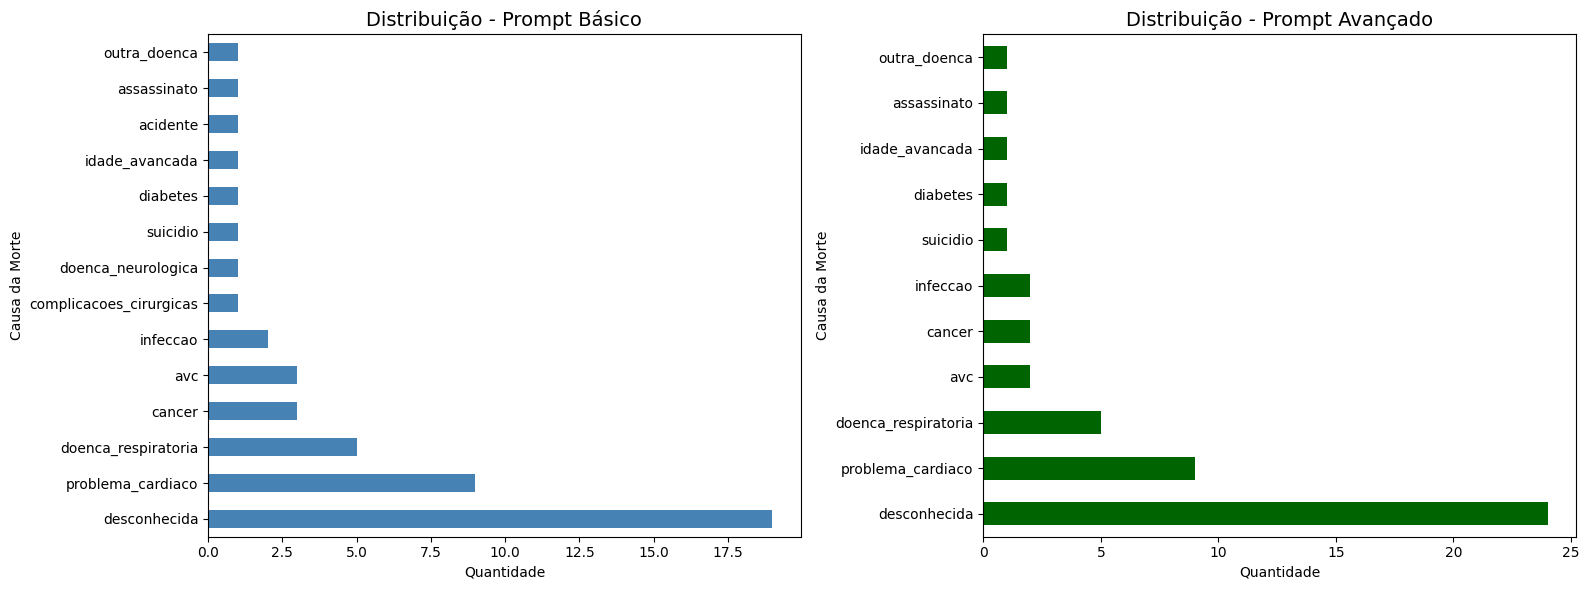

📈 Gráfico salvo: comparacao_distribuicao_causas.png


In [25]:
# Visualização gráfica
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Prompt Básico
distribuicao_basico.plot(kind="barh", ax=axes[0], color="steelblue")
axes[0].set_title("Distribuição - Prompt Básico", fontsize=14)
axes[0].set_xlabel("Quantidade")
axes[0].set_ylabel("Causa da Morte")

# Gráfico 2: Prompt Avançado
distribuicao_avancado.plot(kind="barh", ax=axes[1], color="darkgreen")
axes[1].set_title("Distribuição - Prompt Avançado", fontsize=14)
axes[1].set_xlabel("Quantidade")
axes[1].set_ylabel("Causa da Morte")

plt.tight_layout()
plt.savefig("comparacao_distribuicao_causas.png", dpi=150, bbox_inches="tight")
plt.show()

print("📈 Gráfico salvo: comparacao_distribuicao_causas.png")

In [46]:
# Tabela final resumida
print("\n" + "=" * 100)
print("📋 TABELA FINAL: CLASSIFICAÇÃO DE CAUSA DE MORTE DOS ESCRITORES BRASILEIROS")
print("=" * 100)

tabela_final = pd.DataFrame(
    {
        "Escritor": df_basico["escritor"],
        "Data Morte": df_avancado["data_morte"],
        "Causa (Básico)": df_basico["classificacao_causa"],
        "Causa (Avançado)": df_avancado["classificacao_causa"],
        "Confiança": df_avancado["confianca"],
    }
)

# Formatando para exibição
pd.set_option("display.max_colwidth", 50)
pd.set_option("display.max_rows", 35)

display(tabela_final)


📋 TABELA FINAL: CLASSIFICAÇÃO DE CAUSA DE MORTE DOS ESCRITORES BRASILEIROS


,Escritor,Data Morte,Causa (Básico),Causa (Avançado),Confiança
0,Rachel de Queiroz,4 de novembro de 2003,problema_cardiaco,problema_cardiaco,ALTA
1,Cruz e Sousa,19 de março de 1898,doenca_respiratoria,doenca_respiratoria,ALTA
2,Alphonsus de Guimaraens,15 de julho de 1921,desconhecida,desconhecida,ALTA
3,Vinícius de Moraes,9 de julho de 1980,desconhecida,desconhecida,ALTA
4,Rubem Fonseca,15 de abril de 2020,problema_cardiaco,problema_cardiaco,ALTA
...,...,...,...,...,...
44,Autran Dourado,30 de setembro de 2012,desconhecida,desconhecida,ALTA
45,Ariano Suassuna,23 de julho de 2014,avc,avc,ALTA
46,Bernardo Guimarães,10 de março de 1884,desconhecida,desconhecida,ALTA
47,Gregório de Matos,26 de novembro de 1696,desconhecida,desconhecida,ALTA


In [27]:
# Salvando tabela final
tabela_final.to_csv("tabela_final_classificacao.csv", index=False, encoding="utf-8-sig")
print("💾 Tabela final salva: tabela_final_classificacao.csv")

💾 Tabela final salva: tabela_final_classificacao.csv


## 11. Exemplo de Resposta Detalhada do Prompt Avançado

In [28]:
# Mostrando um exemplo completo de resposta do prompt avançado
exemplo_idx = 0
exemplo_resultado = resultados_avancado[exemplo_idx]

print("=" * 80)
print(f"📖 EXEMPLO DETALHADO: {exemplo_resultado['escritor']}")
print("=" * 80)

print("\n📝 CHUNKS UTILIZADOS:")
for i, chunk in enumerate(exemplo_resultado["chunks_utilizados"], 1):
    print(f"\n--- Chunk {i} ---")
    print(chunk[:500] + "..." if len(chunk) > 500 else chunk)

print("\n" + "=" * 80)
print("🤖 RESPOSTA DO MODELO (Prompt Avançado):")
print("=" * 80)
print(exemplo_resultado.get("resposta_completa", "Não disponível"))

📖 EXEMPLO DETALHADO: Rachel de Queiroz

📝 CHUNKS UTILIZADOS:

--- Chunk 1 ---
Em 1945, o casal passa a morar na Ilha do Governador, no Rio de Janeiro, local muito querido pela escritora. Devido às leis acerca do divórcio vigentes na época, Rachel e Oyama se casaram formalmente apenas em 1977, união que duraria até à morte do marido, em 1982. Rachel de Queiroz faleceu em 4 de novembro de 2003, vítima de problemas cardíacos, no seu apartamento no Rio de Janeiro, dias antes de completar 93 anos. Foi enterrada no cemitério São João Batista, sob a rede onde costumava dormir.

--- Chunk 2 ---
Rachel de Queiroz  (Fortaleza, 17 de novembro de 1910 – Rio de Janeiro, 4 de novembro de 2003) foi uma escritora, jornalista, tradutora, cronista prolífica e importante dramaturga brasileira. É considerada uma das maiores escritoras brasileiras do século XX, tendo sido uma figura pioneira no cenário literário nacional, sobretudo, na produção intelectual e criativa feminina. A escritora foi uma das prime

## 📌 Conclusões

Este notebook demonstrou um pipeline completo para:

1. **Coleta automatizada** de dados biográficos de 30 escritores brasileiros da Wikipedia
2. **Processamento com embeddings** para busca semântica eficiente
3. **Classificação com LLM** usando duas estratégias de prompt

### Diferenças entre os prompts:

| Aspecto | Prompt Básico | Prompt Avançado |
|---------|---------------|-----------------|
| Tamanho | ~200 tokens | ~800 tokens |
| Técnicas | Instrução direta | CoT, Few-shot, Role |
| Estrutura | Resposta livre | Formato estruturado |
| Confiança | Não solicita | Inclui score |
| Custo API | Menor | Maior |

### Recomendações:

- **Use o prompt básico** quando: custo é prioritário, contexto é claro, alta velocidade é necessária
- **Use o prompt avançado** quando: precisão é crítica, casos ambíguos, precisa de explicabilidade